## Download dataset from kaggle

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ahmedhassansaqr/email-spam-detection-v2")

Skipping, found downloaded files in ".\email-spam-detection-v2" (use force=True to force download)


## Load dataset into a dataframe

In [2]:
import pandas as pd
df_email = pd.read_table("./email-spam-detection-v2/smsspamcollection.tsv")

In [3]:
df_email.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df_email.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


## Data study

In [5]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
## Visualizing some random samples
random_idx = random.randint(0,len(df_email))-10
for _,label,message in df_email[["label","message"]][random_idx:random_idx+10].itertuples():
    print(f"""
            Label:{label}
            Message:{message}
            """)


            Label:ham
            Message:Wishing you and your family Merry "X" mas and HAPPY NEW Year in advance..
            

            Label:ham
            Message:At 7 we will go ok na.
            

            Label:ham
            Message:Yes I posted a couple of pics on fb. There's still snow outside too. I'm just waking up :)
            

            Label:ham
            Message:S:-)if we have one good partnership going we will take lead:)
            

            Label:spam
            Message:RGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50
            

            Label:ham
            Message:Yeah, where's your class at?
            

            Label:ham
            Message:No just send to you. Bec you in temple na.
            

            Label:ham
            Message:You aren't coming home between class, right? I need to work out and shower!
            

     

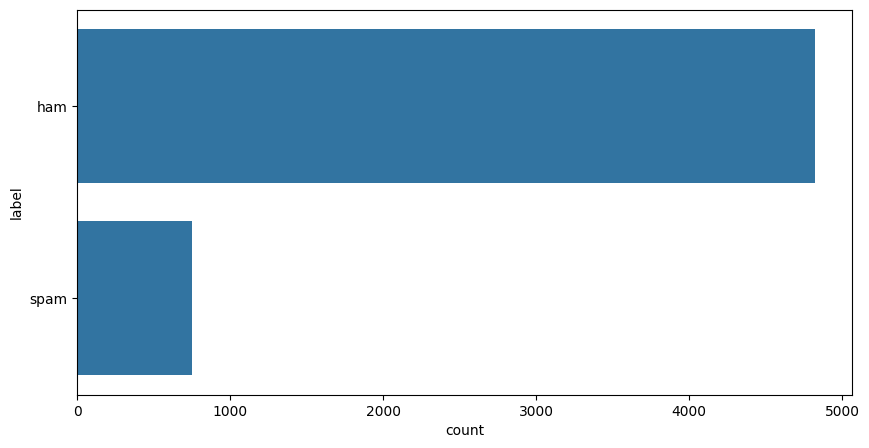

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(df_email.label)
plt.show()

In [8]:
avg_tokens=round(sum([l for l in df_email.length])/len(df_email))
print("Average words per phrase", avg_tokens)

Average words per phrase 80


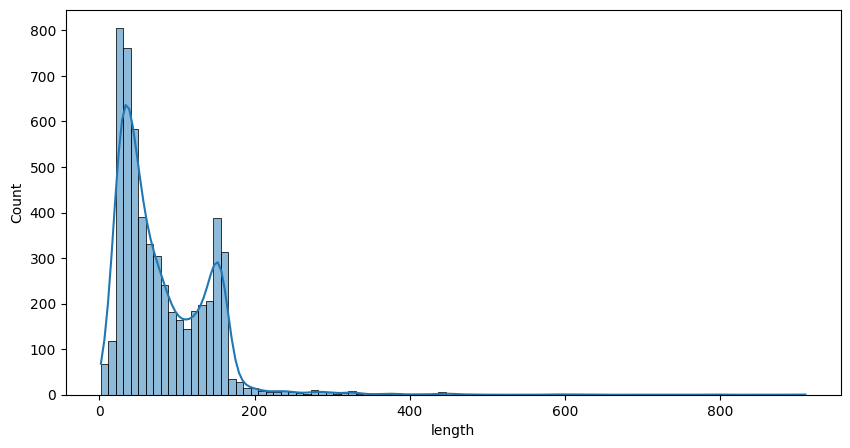

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df_email.length, kde=True)
plt.show()

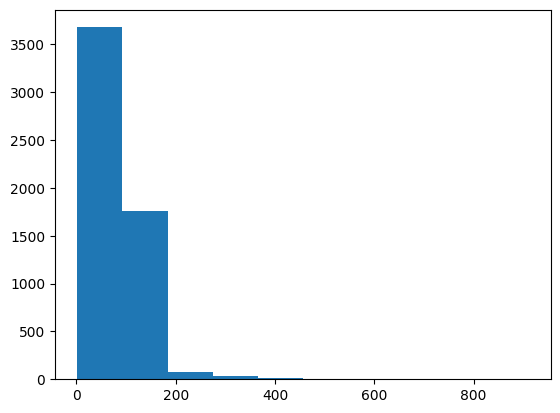

In [10]:
sent_len = [l for l in df_email.length]
plt.hist(sent_len);

In [11]:
## Length of 95% of the sentences
np.percentile(sent_len, 95)

160.0

## Preprocessing text data

In [12]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stemmer = WordNetLemmatizer()

In [13]:
def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    [w for w in text if w not in string.punctuation]
    [stemmer.lemmatize(w) for w in text if w not in stopwords.words("english")]
    text = ' '.join(text)
    return text

In [14]:
df_email["clean_message"] = df_email['message'].map(clean_text)

In [15]:
## Visualizing some random samples
random_idx = random.randint(0,len(df_email))-10
for _,label,message in df_email[["label","clean_message"]][random_idx:random_idx+10].itertuples():
    print(f"""
            Label:{label}
            Message:{message}
            """)


            Label:ham
            Message:where at were hungry too
            

            Label:ham
            Message:pls speak to that customer machan
            

            Label:ham
            Message:somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true goodnite amp sweet dreams
            

            Label:ham
            Message:wen ur lovable bcums angry wid u dnt take it seriously coz being angry is d most childish n true way of showing deep affection care n luv kettoda manda have nice day da
            

            Label:spam
            Message:dear u ve been invited to xchat this is our final attempt to contact u txt chat to p msgrcvdhg suite lands row w j hl ldn yrs
            

            Label:ham
            Message:so wats ur opinion abt him and how abt is character
            

            Label:ham
            Message:jay is snickering and tells me that x is totally fucking up the chords as 

In [16]:
## How many different words ?
words = []
[words.append(word) for word in df_email['clean_message'] if word not in words]
print("There's a total of",len(words), "different words")

There's a total of 5085 different words


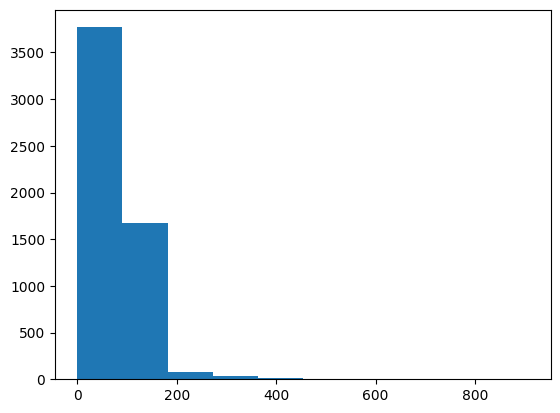

In [17]:
sent_len = [len(w) for w in df_email['clean_message']]
plt.hist(sent_len);

In [18]:
## Length of 90% of the sentences
np.percentile(sent_len, 95)

151.0

## Splitting data into independent and dependent features

In [19]:
df_email.head()

,label,message,length,punct,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,6,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i don t think he goes to usf he lives arou...


In [20]:
sentences = df_email.iloc[:,-1].values
labels = df_email['label']

## Splitting data into training and test sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences,
                                                                              labels,
                                                                              test_size=0.3,
                                                                              shuffle=True,
                                                                              stratify=labels)

In [23]:
train_sentences.shape,train_labels.shape, test_sentences.shape,test_labels.shape

((3900,), (3900,), (1672,), (1672,))

In [24]:
type(train_sentences)

numpy.ndarray

## Encoding labels

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)

In [27]:
np.unique(train_labels)

array([0, 1])

## Text Vectorization layer creation

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

In [29]:
vocab = len(words)
opSeqLeng = 151

In [30]:
vectorization_layer = layers.TextVectorization(max_tokens=vocab,
                                               output_sequence_length=opSeqLeng,
                                               pad_to_max_tokens=True)

In [31]:
vectorization_layer.adapt(train_sentences)

In [32]:
## Visualizing some random samples
random_idx = random.randint(0,len(df_email))-2
for _,label,message in df_email[["label","clean_message"]][random_idx:random_idx+2].itertuples():
    print(f"""
            Label:{label}
            Original Message:{message}
            Vectorized Message:{vectorization_layer(message)}
            """)


            Label:ham
            Original Message:huh so late fr dinner
            Vectorized Message:[599  27 208 789 375   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
            

            Label:ham
            Original Message:hey so this sat are we going for the intro pilates only or the kickboxing too
            Vectorized Message:[ 137   27   42  365   22   31   86   14    6 1624 1573   63   30    6
    1  133    0    0    0    0    0 

## Embedding layer

In [33]:
embedding_layer = layers.Embedding(input_dim=vocab,
                                   output_dim=128,
                                   mask_zero=True)

In [34]:
## Visualizing some random samples
random_idx = random.randint(0,len(df_email))-2
for _,label,message in df_email[["label","clean_message"]][random_idx:random_idx+2].itertuples():
    print(f"""
            Label:{label}
            Original Message:{message}
            Vectorized Message:{vectorization_layer(message)}
            Embeded Message:{embedding_layer(vectorization_layer(message))}
            """)


            Label:spam
            Original Message:get lions england tone reply lionm mono or lionp poly more go www ringtones co uk the original n best tones gbp network operator rates apply
            Vectorized Message:[  35 2670 1403  248   95 4807 4614   30 4806  668  129   46  139  826
  257  191    6 1579   76  259  493  685  398  770 1005  441    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]
        

## Creation of train and test datasets

In [35]:
train_sentences = tf.data.Dataset.from_tensor_slices((train_sentences)) 
test_sentences = tf.data.Dataset.from_tensor_slices((test_sentences)) 
train_labels = tf.data.Dataset.from_tensor_slices((train_labels)) 
test_labels = tf.data.Dataset.from_tensor_slices((test_labels)) 

In [36]:
train_dataset = tf.data.Dataset.zip((train_sentences, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_sentences, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

## Running some experiments

In [37]:
from tensorflow.keras.optimizers import Adam

#### Building model_0 : Simple Dense model

In [38]:
inputs = layers.Input(shape=(1,), dtype=tf.string, name='input_layer')
vec_txt = vectorization_layer(inputs)
embed_txt = embedding_layer(vec_txt)
x =layers.Dense(128, activation='relu')(embed_txt)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_0 = tf.keras.Model(inputs, outputs, name='dense_model')

In [39]:
model_0.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
model_0.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 151)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 151, 128)          650880    
                                                                 
 dense (Dense)               (None, 151, 128)          16512     
                                                                 
 flatten (Flatten)           (None, 19328)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 19329     
                                                       

In [41]:
## fit the model
model_0_history = model_0.fit(train_dataset,
                              epochs=5,
                              steps_per_epoch=int(len(train_dataset)),
                              validation_data=test_dataset,
                              validation_steps=int(0.15*len(test_dataset))) #validates only on 15% of test data

Epoch 1/5
122/122 [==============================] - 2s 6ms/step - loss: 0.2634 - accuracy: 0.9072 - val_loss: 0.0783 - val_accuracy: 0.9732
Epoch 2/5
122/122 [==============================] - 1s 5ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0460 - val_accuracy: 0.9866
Epoch 3/5
122/122 [==============================] - 1s 5ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 4/5
122/122 [==============================] - 1s 5ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0496 - val_accuracy: 0.9911
Epoch 5/5
122/122 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0535 - val_accuracy: 0.9911


In [42]:
model_0.evaluate(test_dataset)

53/53 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9844


[0.07541853189468384, 0.9844497442245483]

## Evaluate the model

In [53]:
from sklearn import metrics

In [45]:
y_pred_probs = model_0.predict(test_dataset)
y_preds = tf.squeeze(tf.round(y_pred_probs))

53/53 [==============================] - 0s 7ms/step


In [49]:
y_true=[]
for _,label in test_dataset.unbatch():
    y_true.append(label.numpy())

In [51]:
y_true = np.array(y_true).flatten()

In [52]:
y_true

array([0, 0, 0, ..., 0, 0, 0])

Accuracy:98.44%


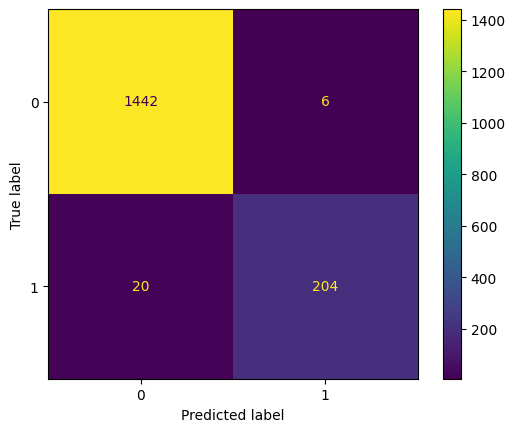

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.91      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672



In [54]:
print(f'Accuracy:{metrics.accuracy_score(y_true, y_preds)*100:.2f}%')
cm = metrics.confusion_matrix(y_true, y_preds)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
print(metrics.classification_report(y_true, y_preds))